# Random Forest From scratch with full explanation of why we our using each and every line of code 🌴-🌴-🌴-🌴-🌴-o/p 🤔 🫷🫷

# Need of using Random Forest is also explained in the last ⬇️⬇️⬇️⬇️⬇️ 👍👍

In [35]:
## Import important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import random


# load the dataset 

In [36]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# Handle the missing values But Why??? 😠 -- To increase oue model accuracy,performance,To reduce bias,To prevent inaccurate accuracy 😦🥹

In [38]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # most common port

In [39]:
# handle the categorical features But Why???? 😠 --- because "Gradient Descent" works properly and smoothly when the data is scaled 😦🥹

In [40]:
# Encode categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [41]:
# Split it into dependent and independent features 👍👍

In [42]:
# Select useful features
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Features and target
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

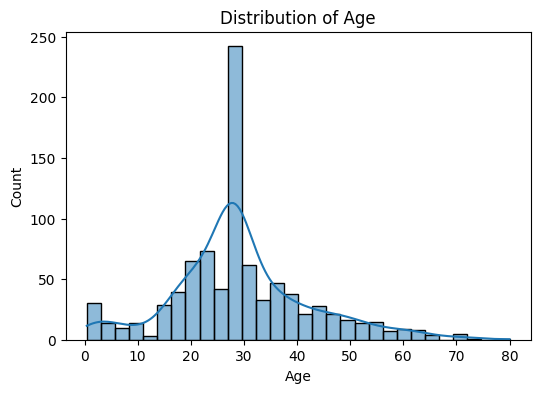

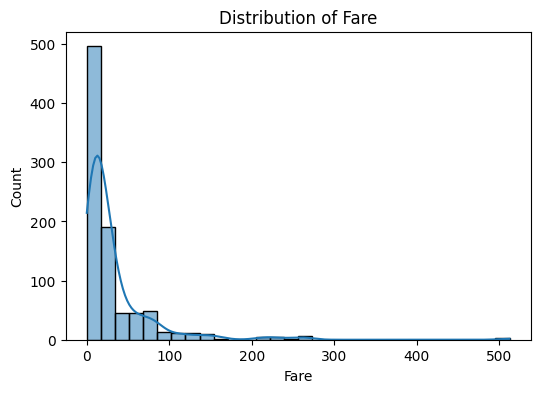

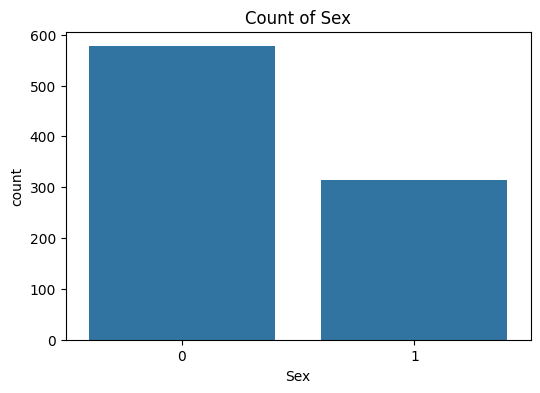

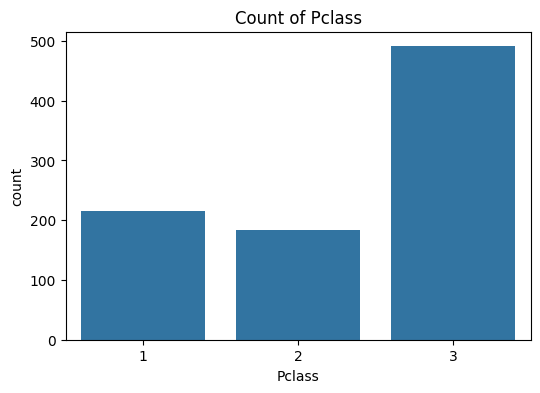

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical features
num_features = ['Age', 'Fare']
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Plot categorical features (like Sex, Pclass)
cat_features = ['Sex', 'Pclass']
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()

# Let's build the decision tree by finding the best feature and threshold at each node through iteration in each feature and each data of that feature using Entropy and Information gain 👍🫡

In [44]:
from collections import Counter
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape

        # Stopping conditions
        if depth >= self.max_depth or num_samples < self.min_samples_split or len(set(y)) == 1:
            return self._majority_vote(y)

        best_feature, best_threshold = self._best_split(X, y)

        # If no valid split found
        if best_feature is None:
            return self._majority_vote(y)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        # 🛑 Avoid creating empty splits
        if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            return self._majority_vote(y)

        # Recursive splitting
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_subtree, right_subtree)

    def _best_split(self, X, y):
        best_gain = -1
        best_feature, best_threshold = None, None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self._information_gain(y, X[:, feature], threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, y, feature_values, threshold):
        parent_entropy = self._entropy(y)

        left_indices = feature_values <= threshold
        right_indices = feature_values > threshold

        if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            return 0

        n = len(y)
        n_left = len(y[left_indices])
        n_right = len(y[right_indices])

        left_entropy = self._entropy(y[left_indices])
        right_entropy = self._entropy(y[right_indices])

        child_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy
        ig = parent_entropy - child_entropy
        return ig

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _majority_vote(self, y):
        if len(y) == 0:
            return 0  # or raise an error, depending on your use case
        return Counter(y).most_common(1)[0][0]

    def predict(self, X):
        return np.array([self._predict(inputs, self.tree) for inputs in X])

    def _predict(self, x, tree):
        if not isinstance(tree, tuple):
            return tree

        feature, threshold, left, right = tree
        if x[feature] <= threshold:
            return self._predict(x, left)
        else:
            return self._predict(x, right)

# Now let's build the structure of random forest by initializing the number of trees and maximum depth of each tree  👍 🫡

In [45]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, sample_size=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.sample_size = sample_size
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, self.sample_size or n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        # Majority vote
        return [Counter(col).most_common(1)[0][0] for col in tree_preds.T]

# Finally,initialize and trian the model 👍👍👍

In [46]:
# Initialize and train Random Forest
forest = RandomForest(n_trees=10, max_depth=10)
forest.fit(X_train, y_train)

# Make predictions
y_pred = forest.predict(X_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy of Random Forest from scratch:", accuracy)

Accuracy of Random Forest from scratch: 0.7988826815642458


In [47]:
# hence , the accuracy of our model is nearly ~81%

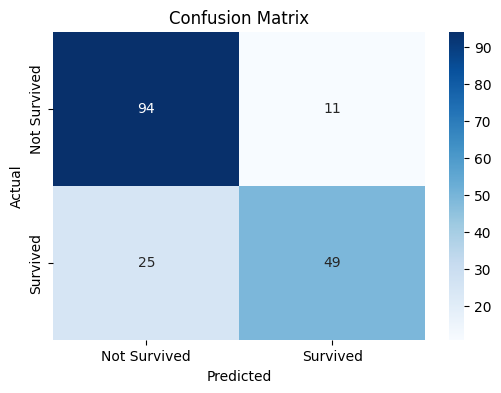

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.82      0.66      0.73        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.79       179



In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived','Survived'], yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

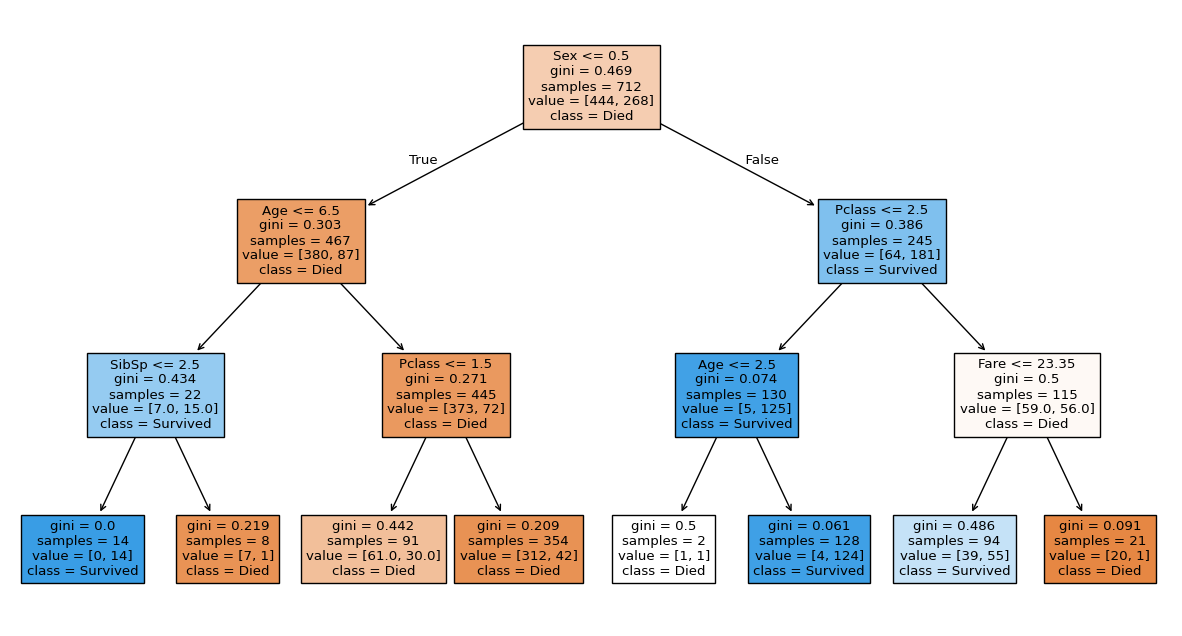

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a sklearn decision tree for visualization
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(15,8))
plot_tree(clf, feature_names=df.drop('Survived', axis=1).columns, 
          class_names=['Died', 'Survived'], filled=True)
plt.show()

In [50]:
# Note 👉 Since,I have implemented everything from Scratch,this tree is not the exactly same but it gives the same idea of splits and thresholds.My scratch implementation works in the same way intenally.

# Why do we use Random Forest Model when We have already Decision Tree like model 🤔🤔🤔 🧠🧠🧠
# It's better than Decision Tree because it doesn't construct only one tree in-depth like decision tree,it construct number of trees and then average the predictions based on "Majority Voting" made by each tree and hence prevents----"OVERFITTING".😯😯 🫡
# we can control the number of trees and depth of each tree in Random Forest 😯😯
# In this way ,we can move from an overfitting model to a Generalised model having low bias and low varinace 😯😯
# Inshort---- (Low Bias,High Variance) is conevrted into-----------------> (Low Bias,Low Varinace) 🫡🫡🫡